In [1]:
from dataset import dataset as ds
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dataset import rasterize

In [2]:
csv_pth = './dataset/hennepin_bbox.csv'
shp_pth = './dataset/hennepin_county_parcels/hennepin_county_parcels.shp'
root_dir = './dataset/image_set/'

dataset = ds.HennepinDataset(csv_pth, shp_pth, root_dir)
print( len(dataset))


1320


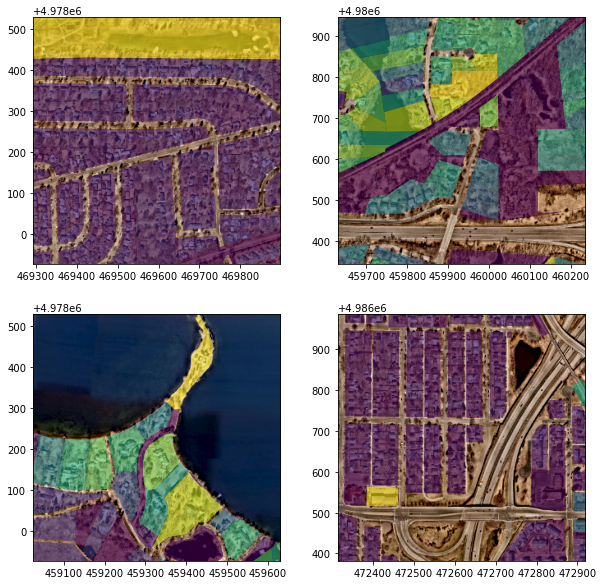

In [6]:
fig,axs = plt.subplots(2, 2, figsize = (10,10))
axs = axs.flatten()
for i in range(0,4):
    x = np.random.randint(len(dataset))
    image = np.moveaxis(dataset[x]['image'], 0, -1)
    gdf = dataset[x]['geometry']
    gdf.plot(column = 'TOTAL_MV1', ax = axs[i], alpha = 0.6, linewidth=3)
    axs[i].imshow(image, extent = dataset[x]['img_bbox'], origin = 'upper')
    #plotter.plot_tile(axs[i], dataset[x]['image'] , extent = dataset[x]['img_bbox'])
fig.savefig('./Plots/tiles.jpg')

In [8]:
index = 345

poly_array = dataset[index]['geometry']
image = dataset[index]['image']
mv_array = dataset[index]['value']
img_bbox = dataset[index]['img_bbox']

In [9]:
fig,axs = plt.subplots(1, 2, figsize = (10,8))

image = np.moveaxis(image, 0, -1)
axs[0].imshow(image, extent = img_bbox, origin = 'upper')
#plotter.plot_tile(axs[0], image, extent = img_bbox)
axs[1].set_xlim( img_bbox[0:2] )
axs[1].set_ylim( img_bbox[2:4] )

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
poly_array.plot(column = 'TOTAL_MV1', ax = axs[1], alpha = 1, linewidth=3, legend = True, legend_kwds={'label': "Total Value $", 'orientation': "vertical"}, cax =cax)


print(img_bbox[2:4])
print(img_bbox[0:2])

TypeError: Invalid shape (3, 302, 302) for image data

In [6]:
fig.savefig('./Plots/parcel.jpg')

<AxesSubplot:>

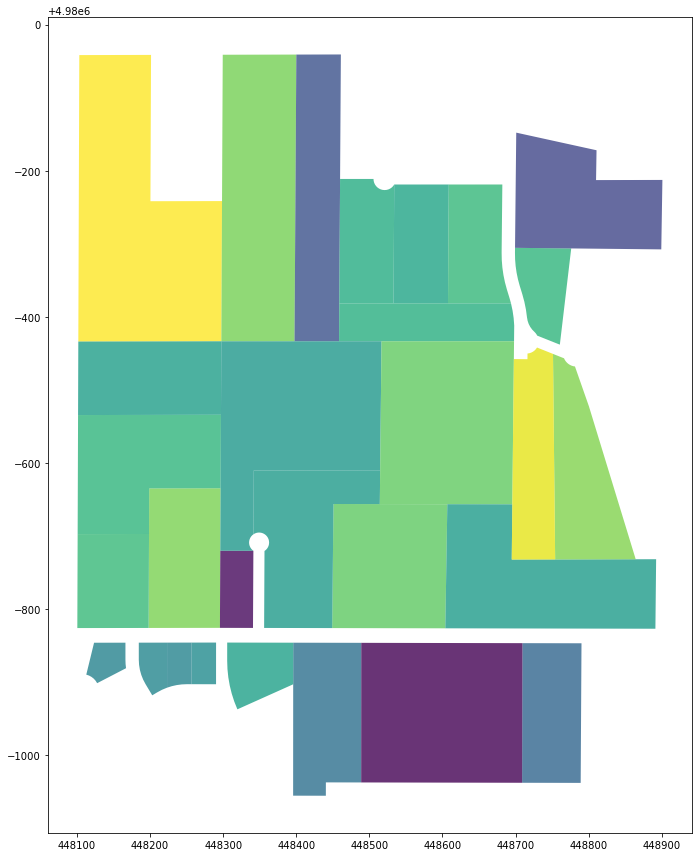

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
#rasterio.plot.show(image, ax=ax, extent=img_bbox)
poly_array.plot(column = 'TOTAL_MV1', ax = ax, alpha = 0.8)

In [8]:
#normalize the values some
mv_array = mv_array / max(mv_array)

geom = poly_array['geometry'].to_frame().join(mv_array)

geom = [tuple(x) for x in geom.to_numpy()]

In [9]:
#transform = rasterio.transform.from_bounds(img_bbox[1],img_bbox[0], img_bbox[2], img_bbox[3], 302, 302 )

im = rasterio.features.rasterize(geom, out_shape = (302,302))

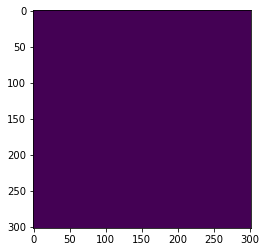

In [10]:
plt.imshow(im)

In [11]:
rasterize.raster(img_bbox, './Plots/output.jpg')